In [21]:
########Modell trainieren
#pip install scikit-learn
####Pakete importieren
import pandas as pd
import os
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

In [22]:
print("2020.csv" in os.listdir())
df_20 = pd.read_csv("2020.csv")
df_20.head()
print("merged_data_unified_country_names" in os.listdir())
df = pd.read_csv("merged_data_unified_country_names.csv")
df.head()

True
False


Year      Country                           Region  Happiness_Rank  \
0  2023      Finland                   Western Europe               1   
1  2023      Denmark                   Western Europe               2   
2  2023      Iceland                   Western Europe               3   
3  2023       Israel  Middle East and Northern Africa               4   
4  2023  Netherlands                   Western Europe               5   

   Happiness  Explained_by_Trust  Explained_by_GDP  Explained_by_Freedom  \
0      7.804               0.535             1.888                 0.772   
1      7.586               0.525             1.949                 0.734   
2      7.530               0.187             1.926                 0.738   
3      7.473               0.158             1.833                 0.569   
4      7.403               0.394             1.942                 0.672   

   Explained_by_Generosity  Explained_by_Health  Explained_by_Social_support  \
0                    0.126                0.535                        1.585   
1                    0.208                0.537                        1.548   
2                    0.250                0.559                        1.620   
3                    0.124                0.577                        1.521   
4                    0.251                0.545                        1.488   

   Dystopia_Residual ISO_Code Region_Code  
0              2.363       FI          WE  
1              2.084       DK          WE  
2              2.250       IS          WE  
3              2.691       IL       MENAF  
4              2.110       NL          WE

In [23]:
print("2023.csv" in os.listdir())
df_23 = pd.read_csv("2023.csv")
df_23.head()

True


Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   
3       Israel         7.473                           0.032         7.535   
4  Netherlands         7.403                           0.029         7.460   

   lowerwhisker  Logged GDP per capita  Social support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   
3         7.411                 10.639           0.943   
4         7.346                 10.942           0.930   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   71.150                         0.961      -0.019   
1                   71.250                         0.934       0.134   
2                   72.050                         0.936       0.211   
3                   72.697                         0.809      -0.023   
4                   71.550                         0.887       0.213   

   Perceptions of corruption  Ladder score in Dystopia  \
0                      0.182                     1.778   
1                      0.196                     1.778   
2                      0.668                     1.778   
3                      0.708                     1.778   
4                      0.379                     1.778   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.888                         1.585   
1                             1.949                         1.548   
2                             1.926                         1.620   
3                             1.833                         1.521   
4                             1.942                         1.488   

   Explained by: Healthy life expectancy  \
0                                  0.535   
1                                  0.537   
2                                  0.559   
3                                  0.577   
4                                  0.545   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.772                     0.126   
1                                       0.734                     0.208   
2                                       0.738                     0.250   
3                                       0.569                     0.124   
4                                       0.672                     0.251   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.535                2.363  
1                                    0.525                2.084  
2                                    0.187                2.250  
3                                    0.158                2.691  
4                                    0.394                2.110

In [24]:
print('life_expectancy.csv' in os.listdir())
df_life = pd.read_csv("life_expectancy.csv")
df_life = df_life.rename(columns= {"Country or Area" : "Country"})
df_life = df_life.rename(columns= {"Year(s)" : "Year"})
df_life.head()

True


Country  Year Variant    Value
0  Afghanistan  2101  Medium      NaN
1  Afghanistan  2100  Medium  77.5384
2  Afghanistan  2099  Medium  77.3909
3  Afghanistan  2098  Medium  77.2354
4  Afghanistan  2097  Medium  77.0851

In [25]:
df = df.merge(df_life[['Country', 'Year', 'Value']], on=['Country', 'Year'], how='left')

# Die Werte aus 'Value' in 'NewValue' speichern
df.rename(columns={'Value': 'Life_Expectancy'}, inplace=True)

# Ergebnis in df2 anzeigen
print(df.head())

   Year      Country                           Region  Happiness_Rank  \
0  2023      Finland                   Western Europe               1   
1  2023      Denmark                   Western Europe               2   
2  2023      Iceland                   Western Europe               3   
3  2023       Israel  Middle East and Northern Africa               4   
4  2023  Netherlands                   Western Europe               5   

   Happiness  Explained_by_Trust  Explained_by_GDP  Explained_by_Freedom  \
0      7.804               0.535             1.888                 0.772   
1      7.586               0.525             1.949                 0.734   
2      7.530               0.187             1.926                 0.738   
3      7.473               0.158             1.833                 0.569   
4      7.403               0.394             1.942                 0.672   

   Explained_by_Generosity  Explained_by_Health  Explained_by_Social_support  \
0                    0.1

In [26]:
df.to_csv('merged_data_life.csv', index=False)

In [1]:
df_20 = df_20.rename(columns={'Logged GDP per capita': 'Logged_GDP_per_capita'})
df_20 = df_20.rename(columns={'Social support': 'Social_support'})
df_20 = df_20.rename(columns={'Healthy life expectancy': 'Healthy_life_expectancy'})
df_20 = df_20.rename(columns={'Freedom to make life choices': 'Freedom_to_make_life_choices'})
df_20 = df_20.rename(columns={'Perceptions of corruption': 'Perceptions_of_corruption'})
df_20 = df_20.rename(columns={'Explained by: Log GDP per capita': 'Explained_by_GDP'})
df_20 = df_20.rename(columns={'Explained by: Freedom to make life choices': 'Explained_by_Freedom'})
df_20 = df_20.rename(columns={'Explained by: Generosity': 'Explained_by_Generosity'})
df_20 = df_20.rename(columns={'Explained by: Perceptions of corruption': 'Explained_by_Trust'})
df_20 = df_20.rename(columns={'Explained by: Healthy life expectancy': 'Explained_by_Health_2'})
df_20 = df_20.rename(columns={'Explained by: Social support': 'Explained_by_Social_support'})

df_20= df_20.dropna()

NameError: name 'df_20' is not defined

In [ ]:
df_23 = df_23.rename(columns={'Logged GDP per capita': 'Logged_GDP_per_capita'})
df_23 = df_23.rename(columns={'Social support': 'Social_support'})
df_23 = df_23.rename(columns={'Healthy life expectancy': 'Healthy_life_expectancy'})
df_23 = df_23.rename(columns={'Freedom to make life choices': 'Freedom_to_make_life_choices'})
df_23 = df_23.rename(columns={'Perceptions of corruption': 'Perceptions_of_corruption'})
df_23 = df_23.rename(columns={'Explained by: Log GDP per capita': 'Explained_by_GDP'})
df_23 = df_23.rename(columns={'Explained by: Freedom to make life choices': 'Explained_by_Freedom'})
df_23 = df_23.rename(columns={'Explained by: Generosity': 'Explained_by_Generosity'})
df_23 = df_23.rename(columns={'Explained by: Perceptions of corruption': 'Explained_by_Trust'})
df_23 = df_23.rename(columns={'Explained by: Healthy life expectancy': 'Explained_by_Health'})
df_23 = df_23.rename(columns={'Explained by: Social support': 'Explained_by_Social_support'})

df_23 = df_23.dropna()

In [ ]:
df_20.head()

In [ ]:
df_23.head()

In [ ]:
df_20['Factor'] = df_20['Explained_by_Health_2']/ df_20['Healthy_life_expectancy']
factor_mean =df_20['Factor'].mean() 

In [2]:
factor_23 = 1.8

In [27]:
#factor_23 =(factor_mean /((df_23['Explained_by_Health']/ df_23['Healthy_life_expectancy']).mean()) )

#df_23['Healthy_Life_Expectancy_2'] = (df_23['Ladder score in Dystopia']/ df_23['Explained_by_Health'])*10

In [28]:
df_23.head()

Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   
3       Israel         7.473                           0.032         7.535   
4  Netherlands         7.403                           0.029         7.460   

   lowerwhisker  Logged_GDP_per_capita  Social_support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   
3         7.411                 10.639           0.943   
4         7.346                 10.942           0.930   

   Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
0                   71.150                         0.961      -0.019   
1                   71.250                         0.934       0.134   
2                   72.050                         0.936       0.211   
3                   72.697                         0.809      -0.023   
4                   71.550                         0.887       0.213   

   Perceptions_of_corruption  Ladder score in Dystopia  Explained_by_GDP  \
0                      0.182                     1.778             1.888   
1                      0.196                     1.778             1.949   
2                      0.668                     1.778             1.926   
3                      0.708                     1.778             1.833   
4                      0.379                     1.778             1.942   

   Explained_by_Social_support  Explained_by_Health  Explained_by_Freedom  \
0                        1.585                0.535                 0.772   
1                        1.548                0.537                 0.734   
2                        1.620                0.559                 0.738   
3                        1.521                0.577                 0.569   
4                        1.488                0.545                 0.672   

   Explained_by_Generosity  Explained_by_Trust  Dystopia + residual  \
0                    0.126               0.535                2.363   
1                    0.208               0.525                2.084   
2                    0.250               0.187                2.250   
3                    0.124               0.158                2.691   
4                    0.251               0.394                2.110   

   Healthy_Life_Expectancy_2  
0                  33.233645  
1                  33.109870  
2                  31.806798  
3                  30.814558  
4                  32.623853

In [24]:
df_20.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged_GDP_per_capita  Social_support  Healthy_life_expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559        0.974670                73.000000   
4              11.087804        0.952487                73.200783   

   Freedom_to_make_life_choices  ...  Perceptions_of_corruption  \
0                      0.949172  ...                   0.195445   
1                      0.951444  ...                   0.168489   
2                      0.921337  ...                   0.303728   
3                      0.948892  ...                   0.711710   
4                      0.955750  ...                   0.263218   

   Ladder score in Dystopia  Explained_by_GDP  Explained_by_Social_support  \
0                  1.972317          1.285190                     1.499526   
1                  1.972317          1.326949                     1.503449   
2                  1.972317          1.390774                     1.472403   
3                  1.972317          1.326502                     1.547567   
4                  1.972317          1.424207                     1.495173   

   Explained_by_Health_2  Explained_by_Freedom  Explained_by_Generosity  \
0               0.961271              0.662317                 0.159670   
1               0.979333              0.665040                 0.242793   
2               1.040533              0.628954                 0.269056   
3               1.000843              0.661981                 0.362330   
4               1.008072              0.670201                 0.287985   

   Explained_by_Trust  Dystopia + residual    Factor  
0            0.477857             2.762835  0.013369  
1            0.495260             2.432741  0.013526  
2            0.407946             2.350267  0.014042  
3            0.144541             2.460688  0.013710  
4            0.434101             2.168266  0.013771  

[5 rows x 21 columns]

In [217]:
correlation = df_20['Logged_GDP_per_capita'].corr(df_20['Explained_by_GDP'])
print(correlation)

0.9999999999999983


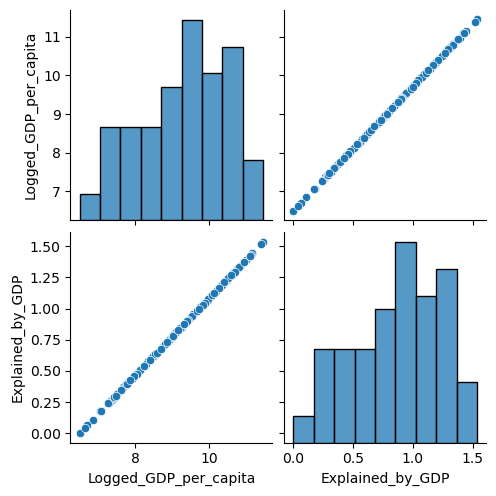

In [218]:
selected_columns = df_20[['Logged_GDP_per_capita', 'Explained_by_GDP']]

# Erstellen Sie den Pairplot
sns.pairplot(selected_columns)
plt.show()

In [219]:
####GDP
model = LinearRegression(fit_intercept=True) ###False setzt intercept = 0

####Feature-Matrix(Dataframe) und Ziel-Vektor organisieren
features= df_20.loc[:, ['Explained_by_GDP']] ###doppelte Klammern für Dataframe
print(type(features))
print(features.shape) #sollte 317, 1 sein
target = df_20.loc[:,'Logged_GDP_per_capita']
print(type(target))
print(len(target))


<class 'pandas.core.frame.DataFrame'>
(153, 1)
<class 'pandas.core.series.Series'>
153


<Axes: xlabel='Explained_by_GDP', ylabel='Logged_GDP_per_capita'>

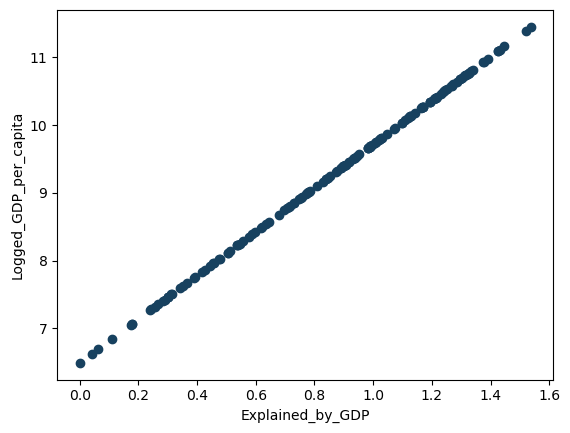

In [220]:
###Visualisieren
sns.regplot(x=features.iloc[:, 0],
            y=target,
            scatter_kws={'color':'#17415f',  # dark blue dots
                        'alpha':1},  # no transparency for dots
            fit_reg=False)  # no regression line



[3.22646935]
6.492642388684923


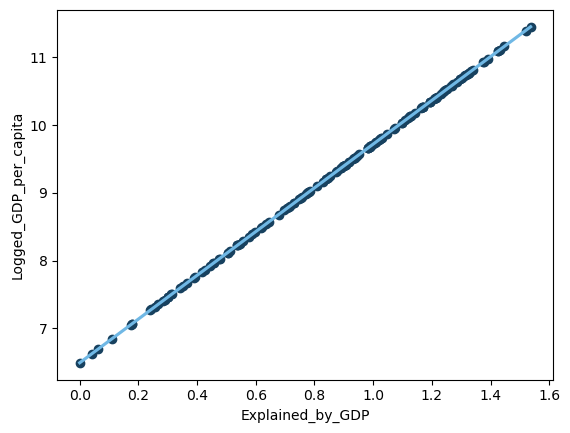

In [221]:
###Model Fitting (auf die Daten anpassen)
model.fit(features, target)

###Visualisieren
sns.regplot(x=features.iloc[:, 0], 
            y=target,
            scatter_kws={'color':'#17415f',  # dark blue dots
                        'alpha':1},  # no transparency for dots
            line_kws={'color':'#70b8e5'},  # light blue regression line
            ci=None)  # no confidence intervals around line

slope_GDP = model.coef_
intercept_GDP = model.intercept_
print(model.coef_)  
print(model.intercept_)

<Axes: xlabel='Explained_by_GDP', ylabel='Logged_GDP_per_capita'>

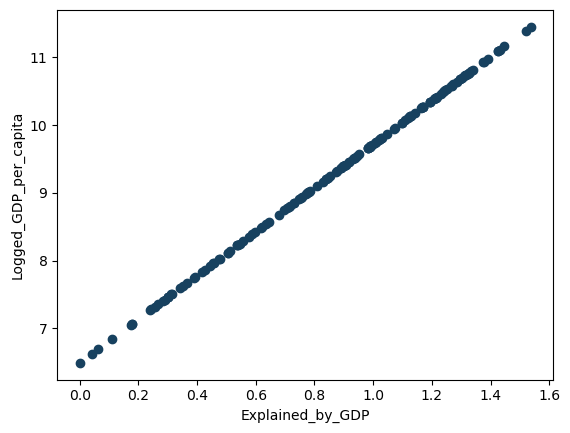

In [222]:
###Visualisieren
sns.regplot(x=features.iloc[:, 0],
            y=target,
            scatter_kws={'color':'#17415f',  # dark blue dots
                        'alpha':1},  # no transparency for dots
            fit_reg=False)  # no regression line


In [223]:
####Mit trainiertem Modell eine Vorgersage tätigen

slope_GDP = model.coef_
intercept_GDP = model.intercept_

df.loc[:, 'Logged_GDP_per_capita'] = intercept_GDP + (slope_GDP * df.loc[:, 'Explained_by_GDP'])

In [224]:
####Social
model = LinearRegression(fit_intercept=True) ###False setzt intercept = 0
####Feature-Matrix(Dataframe) und Ziel-Vektor organisieren
features= df_20.loc[:, ['Explained_by_Social_support']] ###doppelte Klammern für Dataframe
target = df_20.loc[:,'Social_support']
###Model Fitting (auf die Daten anpassen)
model.fit(features, target)
slope_social = model.coef_
intercept_social = model.intercept_
df.loc[:, 'Social_support'] = intercept_social + (slope_social * df.loc[:, 'Explained_by_Social_support'])

In [225]:
####Freedom_to_make_life_choices
model = LinearRegression(fit_intercept=True) ###False setzt intercept = 0
####Feature-Matrix(Dataframe) und Ziel-Vektor organisieren
features= df_20.loc[:, ['Explained_by_Freedom']] ###doppelte Klammern für Dataframe
target = df_20.loc[:,'Freedom_to_make_life_choices']
###Model Fitting (auf die Daten anpassen)
model.fit(features, target)
slope_freedom = model.coef_
intercept_freedom = model.intercept_
df.loc[:, 'Freedom_to_make_life_choices'] = intercept_social + (intercept_freedom * df.loc[:, 'Explained_by_Freedom'])

In [226]:
####Genrerosity
model = LinearRegression(fit_intercept=True) ###False setzt intercept = 0
####Feature-Matrix(Dataframe) und Ziel-Vektor organisieren
features= df_20.loc[:, ['Explained_by_Generosity']] ###doppelte Klammern für Dataframe
target = df_20.loc[:,'Generosity']
###Model Fitting (auf die Daten anpassen)
model.fit(features, target)
slope_generosity = model.coef_
intercept_generosity = model.intercept_
df.loc[:, 'Generosity'] = intercept_generosity + (slope_generosity * df.loc[:, 'Explained_by_Generosity'])

In [227]:
####Corruption
model = LinearRegression(fit_intercept=True) ###False setzt intercept = 0
####Feature-Matrix(Dataframe) und Ziel-Vektor organisieren
features= df_20.loc[:, ['Explained_by_Trust']] ###doppelte Klammern für Dataframe
target = df_20.loc[:,'Perceptions_of_corruption']
###Model Fitting (auf die Daten anpassen)
model.fit(features, target)
slope_corruption = model.coef_
intercept_corruption = model.intercept_
df.loc[:, 'Perceptions_of_corruption'] = intercept_corruption + (slope_corruption * df.loc[:, 'Explained_by_Trust'])

In [228]:
####Health
model = LinearRegression(fit_intercept=True) ###False setzt intercept = 0
####Feature-Matrix(Dataframe) und Ziel-Vektor organisieren
features= df_20.loc[:, ['Explained_by_Health_2']] ###doppelte Klammern für Dataframe
target = df_20.loc[:,'Healthy_life_expectancy']
###Model Fitting (auf die Daten anpassen)
model.fit(features, target)
slope_health = model.coef_
intercept_health = model.intercept_
df_23.loc[:, 'Healthy_life_expectancy_2'] = intercept_health  + (slope_health  * df_23.loc[:, 'Explained_by_Health_2'])

In [229]:
df_23.head()

Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   
3       Israel         7.473                           0.032         7.535   
4  Netherlands         7.403                           0.029         7.460   

   lowerwhisker  Logged_GDP_per_capita  Social_support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   
3         7.411                 10.639           0.943   
4         7.346                 10.942           0.930   

   Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  ...  \
0                   71.150                         0.961      -0.019  ...   
1                   71.250                         0.934       0.134  ...   
2                   72.050                         0.936       0.211  ...   
3                   72.697                         0.809      -0.023  ...   
4                   71.550                         0.887       0.213  ...   

   Ladder score in Dystopia  Explained_by_GDP  Explained_by_Social_support  \
0                     1.778             1.888                        1.585   
1                     1.778             1.949                        1.548   
2                     1.778             1.926                        1.620   
3                     1.778             1.833                        1.521   
4                     1.778             1.942                        1.488   

   Explained_by_Health  Explained_by_Freedom  Explained_by_Generosity  \
0                0.535                 0.772                    0.126   
1                0.537                 0.734                    0.208   
2                0.559                 0.738                    0.250   
3                0.577                 0.569                    0.124   
4                0.545                 0.672                    0.251   

   Explained_by_Trust  Dystopia + residual  Explained_by_Health_2  \
0               0.535                2.363                 0.9630   
1               0.525                2.084                 0.9666   
2               0.187                2.250                 1.0062   
3               0.158                2.691                 1.0386   
4               0.394                2.110                 0.9810   

   Healthy_life_expectancy_2  
0                  71.948841  
1                  72.048836  
2                  73.148789  
3                  74.048750  
4                  72.448819  

[5 rows x 21 columns]

In [230]:
df.to_csv("merged_data_2")

In [231]:
####Health
model = LinearRegression(fit_intercept=True) ###False setzt intercept = 0
####Feature-Matrix(Dataframe) und Ziel-Vektor organisieren
features= df_20.loc[:, ['Explained_by_Health_2']] ###doppelte Klammern für Dataframe
target = df_20.loc[:,'Healthy_life_expectancy']
###Model Fitting (auf die Daten anpassen)
model.fit(features, target)
slope_health = model.coef_
intercept_health = model.intercept_

########Daten, für die eine Vorhersage gemacht werden soll
###Daten importieren
features_aim = df_23.loc[:,['Explained_by_Health_2']]
target_aim = df_23.loc[:,'Healthy_life_expectancy']
target_aim_pred= model.predict(features_aim)



<Axes: xlabel='Explained_by_Health_2', ylabel='Healthy_life_expectancy'>

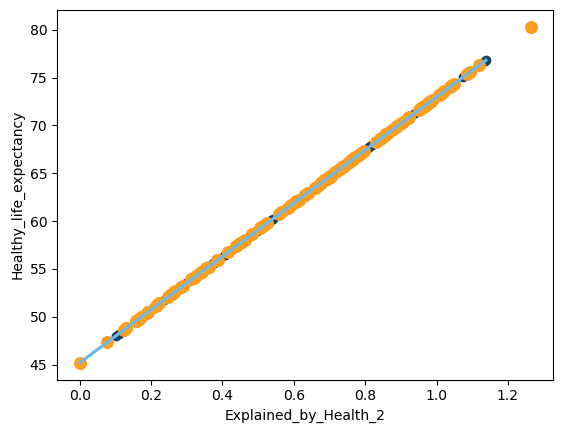

In [232]:
####Visualisierung

fig, ax = plt.subplots()

sns.regplot(x=features.iloc[:, 0],  # metro distances in training data set
            y=target,  # prices in training data set
            scatter_kws={'color':'#17415f',  # dark blue dots
                         'alpha':1},  # no transparency for dots
            line_kws={'color':'#70b8e5'},  # light blue regression line
            ci=None,  # no confidence intervals around line
            ax=ax)  # plot on current Axes

sns.regplot(x=features_aim.iloc[:, 0],  # x-values of houses with estimated prices
            y=target_aim_pred,  # estimated prices
            scatter_kws={'color':'#ff9e1c',  # orange dots
                         'alpha':1,  # no transparency for dots
                         's':70},  # dot size
            fit_reg=False,  # no additional regression line
            ci=None,  # no confidence intervals around line
            ax=ax)  # plot on current Axes


In [233]:
residuals = target_aim - target_aim_pred

In [203]:
print(residuals.mean() )

0.35014198270193253


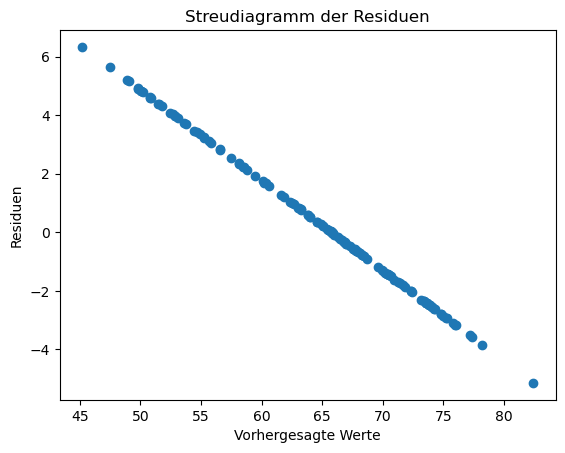

In [204]:
plt.scatter(target_aim_pred, residuals)
plt.xlabel("Vorhergesagte Werte")
plt.ylabel("Residuen")
plt.title("Streudiagramm der Residuen")
plt.show()

In [43]:
 45.20000078422454  + (27.77657302  * 0.535)

60.060467349924544

In [78]:
 45.20000078422454  + (27.77657302  *( 1.28 * 0.535))

64.22139798832055

In [ ]:
7.804

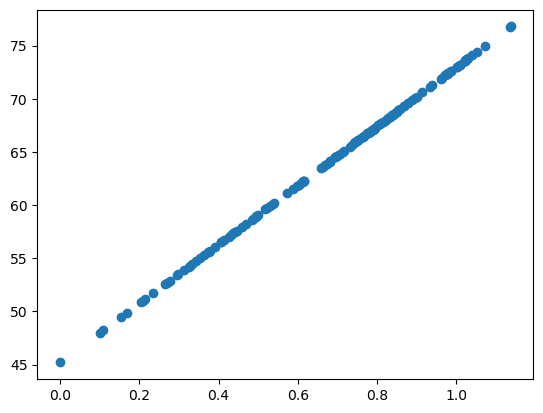

In [67]:
plt.scatter(df_20.loc[:,'Explained_by_Health'], df_20.loc[:,'Healthy_life_expectancy'])

In [ ]:
0.961271